# penguins_ctgan stacking

Training on penguins dataset using ctgan model and stacking data

In [37]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

Declare real dataset and split into train/test

In [2]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "ctgan"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

# syn_v1

In [5]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-06T14:17:42.096565+0200][1572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 60%|█████▉    | 1199/2000 [01:54<01:16, 10.44it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
230     Gentoo     Biscoe              40.9             13.7   
84      Adelie      Dream              37.3             17.8   
303     Gentoo     Biscoe              50.0             15.9   
22      Adelie     Biscoe              35.9             19.2   
29      Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
194  Chinstrap      Dream              50.9             19.1   
77      Adelie  Torgersen              37.2             19.4   
112     Adelie     Biscoe              39.7             17.7   
277     Gentoo     Biscoe              45.5             15.0   
108     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
230              214.0       4650.0  FEMALE  
84               191.0       3350.0  FEMALE  
303              224.0       5350.0    MALE  
22               189.0       3800.0 

# syn_v2

In [7]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [11]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-06T14:32:34.785295+0200][1572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 25%|██▍       | 499/2000 [01:20<04:01,  6.23it/s]


[{'train':     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
235  Gentoo     Biscoe              45.1             14.5              215.0   
399  Adelie  Torgersen              36.4             17.9              187.6   
602  Gentoo     Biscoe              37.2             16.9              218.2   
61   Adelie     Biscoe              41.1             19.1              188.0   
145  Adelie      Dream              41.5             18.5              201.0   
..      ...        ...               ...              ...                ...   
71   Adelie  Torgersen              37.2             19.4              184.0   
106  Adelie     Biscoe              39.7             17.7              193.0   
270  Gentoo     Biscoe              45.5             15.0              220.0   
435  Adelie     Biscoe              40.0             18.3              188.1   
102  Adelie     Biscoe              38.1             17.0              181.0   

     body_mass_g     sex  
2

# syn_v3

In [12]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [13]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-06T14:42:09.960135+0200][1572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 17%|█▋        | 349/2000 [01:33<07:20,  3.75it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1112     Gentoo     Biscoe              43.7             14.1   
966      Adelie      Dream              41.3             19.3   
598      Adelie      Dream              37.6             19.5   
170   Chinstrap      Dream              46.7             17.9   
275      Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1095     Adelie      Dream              46.9             19.9   
1130     Adelie      Dream              37.5             18.9   
1294     Gentoo     Biscoe              48.9             15.5   
860      Adelie  Torgersen              39.7             19.6   
1126     Gentoo     Biscoe              48.4             14.9   

      flipper_length_mm  body_mass_g     sex  
1112              224.3       4812.4  FEMALE  
966               196.2       3574.4  FEMALE  
598               185.4       3888.5    MALE  
170               19

# syn_v4

In [14]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [15]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-06T14:43:43.759611+0200][1572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 27%|██▋       | 549/2000 [04:52<12:52,  1.88it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1011  Chinstrap      Dream              46.0             19.5   
1273     Gentoo     Biscoe              48.2             16.2   
69       Adelie  Torgersen              42.8             18.5   
2539  Chinstrap      Dream              48.7             19.1   
942      Adelie      Dream              39.7             19.7   
...         ...        ...               ...              ...   
1638     Gentoo     Biscoe              49.8             14.7   
1095     Adelie      Dream              46.9             19.9   
1130     Adelie      Dream              37.5             18.9   
1294     Gentoo     Biscoe              48.9             15.5   
860      Adelie  Torgersen              39.7             19.6   

      flipper_length_mm  body_mass_g     sex  
1011              201.1       3668.0  FEMALE  
1273              223.4       5050.5    MALE  
69                195.0       4250.0    MALE  
2539              19

# syn_v5

In [16]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [17]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-06T14:48:37.074536+0200][1572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 42%|████▏     | 849/2000 [17:04<23:09,  1.21s/it]  


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054  Chinstrap      Dream              47.5             19.5   
120      Adelie  Torgersen              38.8             17.6   
2351     Gentoo     Biscoe              45.1             15.3   
1907     Gentoo     Biscoe              45.9             14.7   
3648     Gentoo     Biscoe              47.1             18.2   
...         ...        ...               ...              ...   
3092     Gentoo  Torgersen              45.3             14.7   
3772     Adelie     Biscoe              37.6             17.5   
5191  Chinstrap      Dream              48.9             19.2   
5226     Adelie      Dream              36.4             17.9   
860      Adelie  Torgersen              39.7             19.6   

      flipper_length_mm  body_mass_g     sex  
5054              219.8       5046.2    MALE  
120               191.0       3275.0  FEMALE  
2351              222.0       4436.2  FEMALE  
1907              22

# stack_v5 - Final stack

In [22]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [23]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method).Save("stack_v5")

[2024-05-06T15:15:49.672347+0200][1572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 17%|█▋        | 349/2000 [31:14<2:27:48,  5.37s/it]


# stack_v5 (synth only)

In [24]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [25]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method).Save("stack_synth_only")

[2024-05-06T15:48:08.046113+0200][1572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 17%|█▋        | 349/2000 [32:11<2:32:15,  5.53s/it]


# Generate synth data based on stack_v5

In [31]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
11326  Chinstrap      Dream              47.9             19.7   
25374     Gentoo     Biscoe              45.3             15.7   
24469  Chinstrap      Dream              39.1             19.1   
21090     Gentoo     Biscoe              47.2             19.2   
20336  Chinstrap      Dream              48.8             19.9   
...          ...        ...               ...              ...   
21575     Gentoo     Biscoe              44.6             15.0   
5390   Chinstrap      Dream              47.4             19.7   
860       Adelie  Torgersen              39.7             19.6   
15795     Gentoo     Biscoe              47.7             15.8   
23654     Gentoo     Biscoe              44.4             15.2   

       flipper_length_mm  body_mass_g     sex  
11326              180.6       3856.6    MALE  
25374              218.7       4696.0  FEMALE  
24469              209.9       2819.3  FEMALE  
2109

In [34]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [32]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
4483      Gentoo     Biscoe              44.9             14.5   
7346      Adelie  Torgersen              37.7             15.5   
5981      Adelie     Biscoe              37.2             19.8   
25005     Adelie     Biscoe              36.3             15.1   
1209      Gentoo      Dream              44.8             14.7   
...          ...        ...               ...              ...   
21909  Chinstrap      Dream              47.9             19.7   
5724      Adelie  Torgersen              37.2             18.4   
1194      Gentoo     Biscoe              44.4             14.8   
16129     Adelie      Dream              37.5             18.8   
23988     Adelie     Biscoe              37.8             19.7   

       flipper_length_mm  body_mass_g     sex  
4483               209.0       4485.4  FEMALE  
7346               181.9       3176.6  FEMALE  
5981               184.3       3346.1    MALE  
2500

In [36]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [43]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.040133,0.008948,0.959867,0.008948
1,pca_eigval_diff,u,0.078565,NaN,0.921435,NaN
2,pca_eigvec_ang,u,0.023454,NaN,0.992534,NaN
3,avg_cio,u,0.215864,0.215864,0.215864,0.215864
4,corr_mat_diff,u,0.686030,NaN,0.967332,NaN
5,mutual_inf_diff,u,0.687193,NaN,0.967277,NaN
6,ks_tvd_stat,u,0.113284,0.021102,0.886716,0.021102
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.023118,0.011458,0.976882,0.011458
9,avg_pMSE,u,0.024582,0.002702,0.901673,0.010808


# Eval on syn_2

In [44]:
# Read train and test data from stack_v1
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v1_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v1_test.csv")

# Read syn_v2 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.065163,0.006306,0.934837,0.006306
1,pca_eigval_diff,u,0.050027,NaN,0.949973,NaN
2,pca_eigvec_ang,u,0.112955,NaN,0.964045,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.535937,NaN,0.974479,NaN
5,mutual_inf_diff,u,0.239054,NaN,0.988616,NaN
6,ks_tvd_stat,u,0.186387,0.027145,0.813613,0.027145
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.044712,0.021702,0.955288,0.021702
9,avg_pMSE,u,0.042463,0.002366,0.830149,0.009465


# Eval on syn_3

In [45]:
# Read train and test data from stack_v2
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v2_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v2_test.csv")

# Read syn_v3 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.060727,0.004530,0.939273,0.004530
1,pca_eigval_diff,u,0.109454,NaN,0.890546,NaN
2,pca_eigvec_ang,u,0.072884,NaN,0.976800,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.777548,NaN,0.962974,NaN
5,mutual_inf_diff,u,0.535956,NaN,0.974478,NaN
6,ks_tvd_stat,u,0.126916,0.035650,0.873084,0.035650
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.016511,0.009544,0.983489,0.009544
9,avg_pMSE,u,0.052544,0.001384,0.789823,0.005535


# Eval on syn_4

In [46]:
# Read train and test data from stack_v3
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v3_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v3_test.csv")

# Read syn_v4 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.045122,0.003170,0.954878,0.003170
1,pca_eigval_diff,u,0.051490,NaN,0.948510,NaN
2,pca_eigvec_ang,u,0.019755,NaN,0.993712,NaN
3,avg_cio,u,0.178843,0.178843,0.178843,0.178843
4,corr_mat_diff,u,0.321403,NaN,0.984695,NaN
5,mutual_inf_diff,u,0.232553,NaN,0.988926,NaN
6,ks_tvd_stat,u,0.124962,0.039264,0.875038,0.039264
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.017328,0.009092,0.982672,0.009092
9,avg_pMSE,u,0.040955,0.001637,0.836180,0.006548


# Eval on syn_5

In [47]:
# Read train and test data from stack_v4
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v4_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v4_test.csv")

# Read syn_v5 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.049048,0.002163,0.950952,0.002163
1,pca_eigval_diff,u,0.014774,NaN,0.985226,NaN
2,pca_eigvec_ang,u,0.009591,NaN,0.996947,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.192743,NaN,0.990822,NaN
5,mutual_inf_diff,u,0.219175,NaN,0.989563,NaN
6,ks_tvd_stat,u,0.103373,0.040928,0.896627,0.040928
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.007224,0.003916,0.992776,0.003916
9,avg_pMSE,u,0.027120,0.000487,0.891522,0.001950


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [48]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.027034,0.008865,0.972966,0.008865
1,pca_eigval_diff,u,0.082257,NaN,0.917743,NaN
2,pca_eigvec_ang,u,0.058463,NaN,0.981391,NaN
3,avg_cio,u,0.210431,0.210431,0.210431,0.210431
4,corr_mat_diff,u,0.730486,NaN,0.965215,NaN
5,mutual_inf_diff,u,0.646994,NaN,0.969191,NaN
6,ks_tvd_stat,u,0.149974,0.026936,0.850026,0.026936
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.031345,0.017187,0.968655,0.017187
9,avg_pMSE,u,0.051267,0.002157,0.794933,0.008627


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [49]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.033128,0.008878,0.966872,0.008878
1,pca_eigval_diff,u,0.053695,NaN,0.946305,NaN
2,pca_eigvec_ang,u,0.078682,NaN,0.974955,NaN
3,avg_cio,u,0.224226,0.149004,0.224226,0.149004
4,corr_mat_diff,u,0.741211,NaN,0.964704,NaN
5,mutual_inf_diff,u,0.703904,NaN,0.966481,NaN
6,ks_tvd_stat,u,0.182094,0.027476,0.817906,0.027476
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.038515,0.021325,0.961485,0.021325
9,avg_pMSE,u,0.050731,0.003486,0.797075,0.013944


# Multiple plots for evaluation comparisons

In [50]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [110]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [111]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.258427,0.464927,0.033708
res_stack_v1,0.230337,0.438837,0.050562
res_stack_v2,0.153558,0.405475,0.047753
res_stack_v3,0.364062,0.481769,0.372953
res_stack_v4,0.232749,0.467226,0.320234


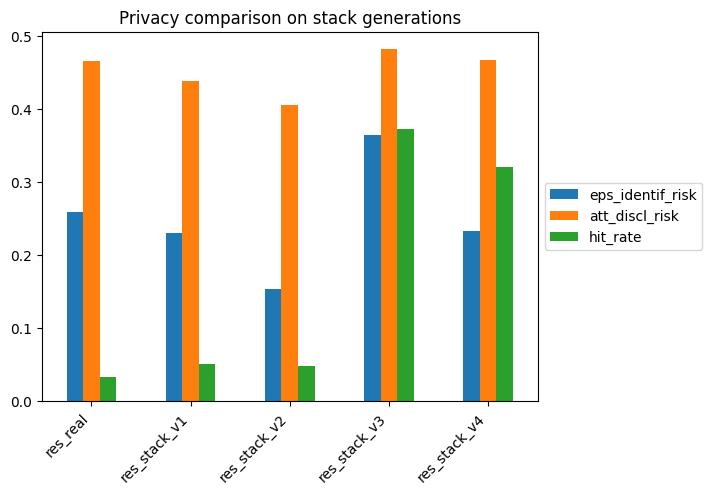

In [112]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [113]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.040133,0.078565,0.023454
res_stack_v1,0.065163,0.050027,0.112955
res_stack_v2,0.060727,0.109454,0.072884
res_stack_v3,0.045122,0.051490,0.019755
res_stack_v4,0.049048,0.014774,0.009591


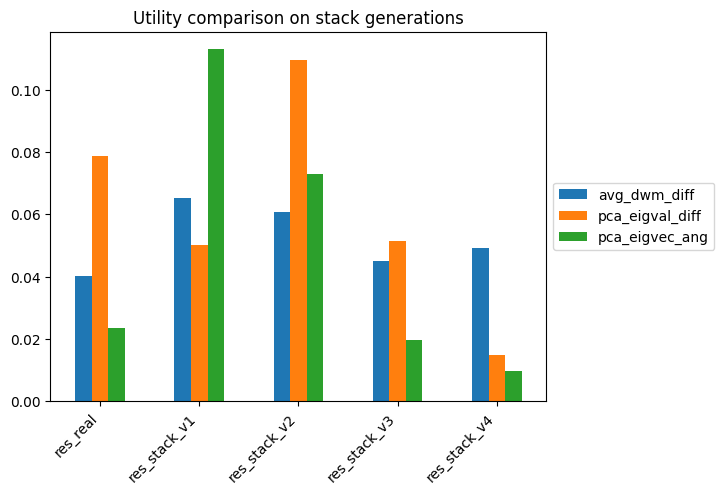

In [114]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [115]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.686030,0.687193
res_stack_v1,0.535937,0.239054
res_stack_v2,0.777548,0.535956
res_stack_v3,0.321403,0.232553
res_stack_v4,0.192743,0.219175


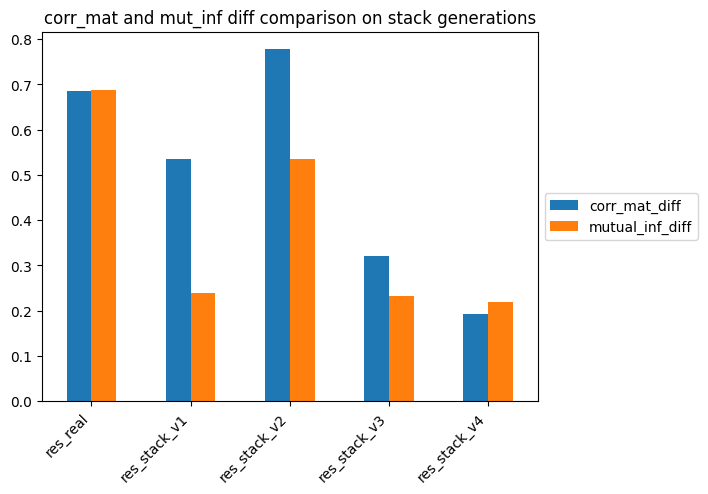

In [116]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [117]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.040133,0.078565,0.023454,0.215864,0.686030,0.687193,0.113284,0.571429,0.023118,0.024582,0.825444,-0.002970,0.734183,-0.103089,0.073113,0.070896,0.033708,0.258427,0.941176,0.464927
res_stack_v1,0.065163,0.050027,0.112955,0.000000,0.535937,0.239054,0.186387,1.000000,0.044712,0.042463,0.821753,0.012945,0.773305,-0.143578,0.035126,0.046642,0.050562,0.230337,0.976119,0.438837
res_stack_v2,0.060727,0.109454,0.072884,0.000000,0.777548,0.535956,0.126916,0.714286,0.016511,0.052544,0.837177,-0.012889,0.873164,-0.038649,0.120334,0.078358,0.047753,0.153558,0.434328,0.405475
res_stack_v3,0.045122,0.051490,0.019755,0.178843,0.321403,0.232553,0.124962,0.857143,0.017328,0.040955,0.826724,-0.000546,0.690864,0.096176,0.023514,0.022897,0.372953,0.364062,0.870896,0.481769
res_stack_v4,0.049048,0.014774,0.009591,0.000000,0.192743,0.219175,0.103373,0.714286,0.007224,0.027120,0.826067,0.001525,0.798273,0.003426,0.054503,0.032507,0.320234,0.232749,0.746542,0.467226


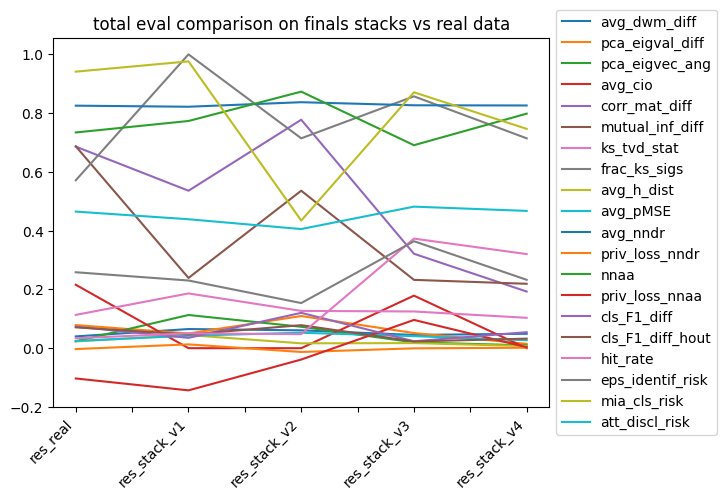

In [118]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [119]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [120]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.258427,0.464927,0.033708
res_stack_v5_on_real,0.217228,0.472198,0.063670
res_stack_synth_only_on_real,0.097378,0.429855,0.022472


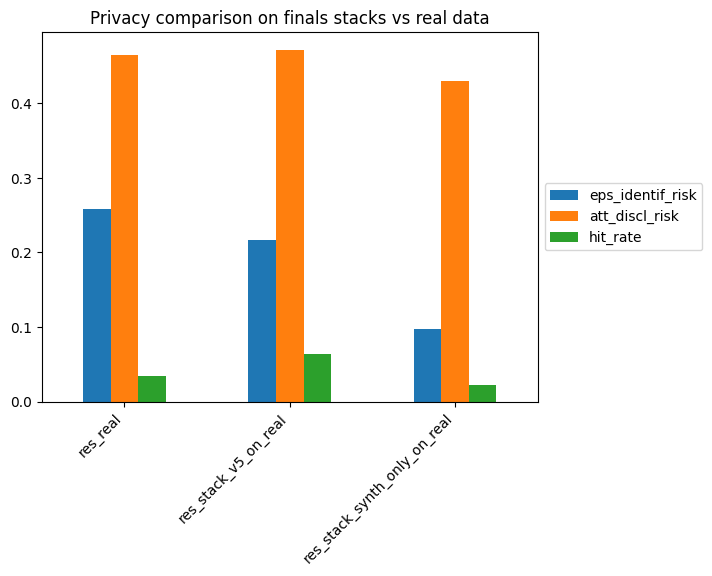

In [121]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [122]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.040133,0.078565,0.023454
res_stack_v5_on_real,0.027034,0.082257,0.058463
res_stack_synth_only_on_real,0.033128,0.053695,0.078682


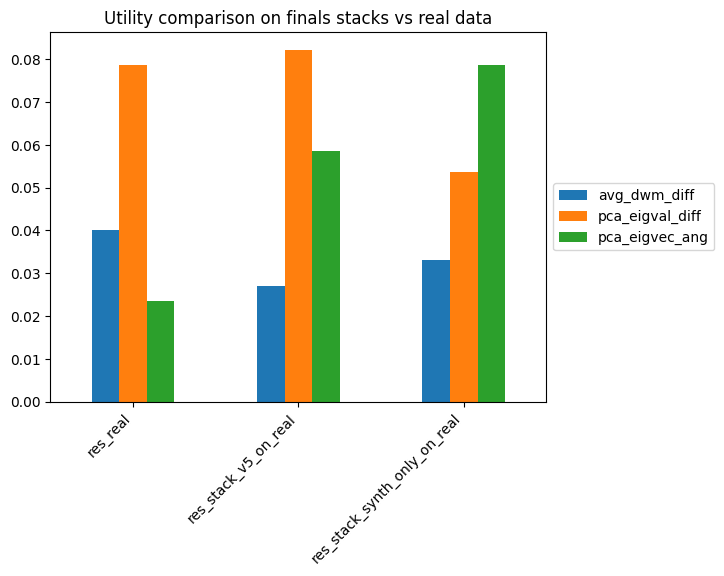

In [123]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [124]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.686030,0.687193
res_stack_v5_on_real,0.730486,0.646994
res_stack_synth_only_on_real,0.741211,0.703904


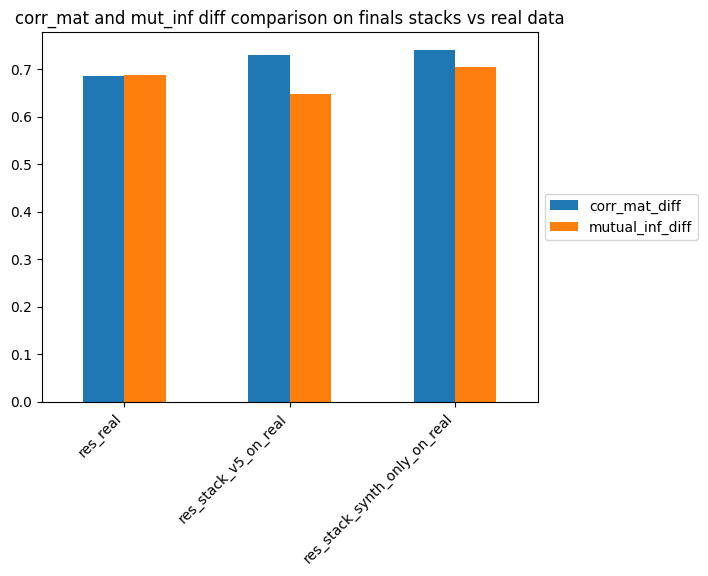

In [125]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [126]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.040133,0.078565,0.023454,0.215864,0.686030,0.687193,0.113284,0.571429,0.023118,0.024582,0.825444,-0.002970,0.734183,-0.103089,0.073113,0.070896,0.033708,0.258427,0.941176,0.464927
res_stack_v5_on_real,0.027034,0.082257,0.058463,0.210431,0.730486,0.646994,0.149974,0.857143,0.031345,0.051267,0.836232,-0.022374,0.792583,-0.084126,0.085133,0.070896,0.063670,0.217228,0.817647,0.472198
res_stack_synth_only_on_real,0.033128,0.053695,0.078682,0.224226,0.741211,0.703904,0.182094,0.857143,0.038515,0.050731,0.827862,0.022615,0.899291,-0.078645,0.100891,0.089552,0.022472,0.097378,0.717647,0.429855


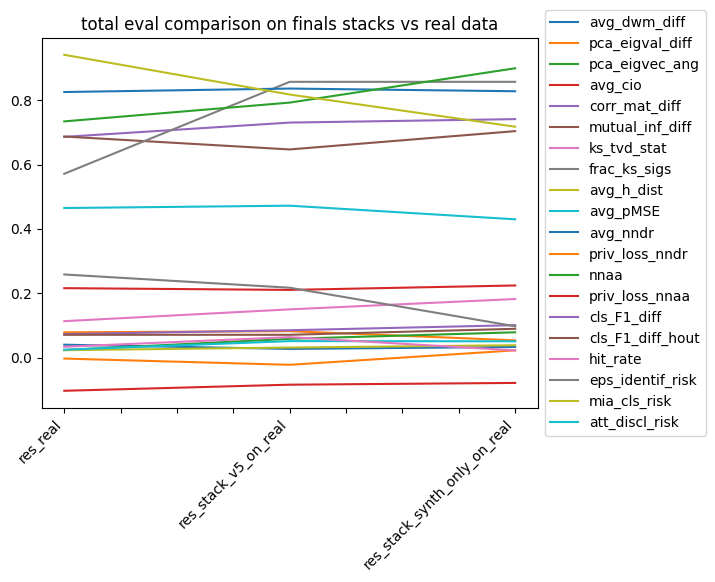

In [127]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()